In [90]:
#pip install tensorflow

In [91]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [93]:
from PIL import Image
import glob
x = []
y = []
for filename in glob.glob('drive/MyDrive/MalariaClassification/Parasitized/*.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(1)

for filename in glob.glob('drive/MyDrive/MalariaClassification/Uninfected/*.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(0)

Kod ilk olarak PIL kütüphanesinin Image modülünü ve dosya eşleştirme işlemleri için kullanılan glob modülünü içerir. Daha sonra, iki boş liste olan x ve y oluşturur.

Sonraki aşamada, kod glob.glob() fonksiyonunu kullanarak, belirtilen dizinde .png uzantılı tüm dosyaları bulur. Bu işlemde joker karakteri (*) herhangi bir karakteri eşleştirir ve dizin yolunu belirten bir dize kullanılır.

Bulunan her dosya için, kod Image.open() fonksiyonu ile dosyayı açar, resize() metodu ile görüntüyü (64, 64) boyutuna getirir ve np.array() fonksiyonu ile NumPy dizisine dönüştürür. Bu sonuç dizisi x listesine eklenir.

Kod ayrıca, ilk dizinde bulunan Parasitized dosya için y listesine değer olarak 1 ekler. Bu, dosyanın belirli bir sınıf veya kategoriye ait olduğunu gösterir.

Kod daha sonra bu işlemi ikinci bir dizin için tekrar eder, ancak bu sefer bulunan uninfected dosyası için y listesine 0 değeri ekler. Bu, ikinci dizindeki görüntülerin farklı bir sınıf veya kategoriye ait olduğunu gösterir.

In [94]:
len(x),len(y)
#eleman sayılarını yazdırır.

(1040, 1040)

In [95]:
y.count(0)
#y içinde kaç tane 0 olduğunu gösterir

377

In [97]:
y.count(1)

663

In [72]:
x=(np.array(x).astype(int))/255
y=(np.array(y))
# x'i bir NumPy dizisine dönüştürür ve daha sonra dizi elemanlarının veri türünü int olarak ayarlar.
#255 değeri bölünür. Bu işlem, dizideki değerleri 0 ile 1 arasına ölçekler.
#Bu kodun amacının, x ve y verilerini bir makine öğrenimi modeli için kullanılmaya hazırlamak olduğu muhtemeldir.
# Verileri NumPy dizilerine dönüştürmek ve x'deki değerleri ölçeklemek, verilerle çalışmayı kolaylaştırır ve bazı makine öğrenimi algoritmalarının performansını arttırabilir.

In [73]:
x.shape

(1040, 64, 64, 3)

In [74]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

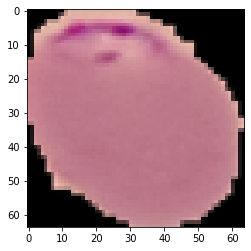

In [75]:
plt.imshow(x[654])

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
#verilerin %20'si test veri kümesine ve %80'i eğitim veri kümesine aittir

In [77]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(64,64,3)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(20, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),])


model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(x_test,y_test))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


26/26 [==============================] - 49s 2s/step - loss: 0.6889 - accuracy: 0.6010 - val_loss: 0.6453 - val_accuracy: 0.6394
Epoch 2/15
26/26 [==============================] - 46s 2s/step - loss: 0.6553 - accuracy: 0.6130 - val_loss: 0.6113 - val_accuracy: 0.6394
Epoch 3/15
26/26 [==============================] - 43s 2s/step - loss: 0.6695 - accuracy: 0.6298 - val_loss: 0.6630 - val_accuracy: 0.6394
Epoch 4/15
26/26 [==============================] - 44s 2s/step - loss: 0.6485 - accuracy: 0.6490 - val_loss: 0.6021 - val_accuracy: 0.8365
Epoch 5/15
26/26 [==============================] - 48s 2s/step - loss: 0.5548 - accuracy: 0.7476 - val_loss: 0.5012 - val_accuracy: 0.7933
Epoch 6/15
26/26 [==============================] - 43s 2s/step - loss: 0.4139 - accuracy: 0.8305 - val_loss: 0.3267 - val_accuracy: 0.8365
Epoch 7/15
26/26 [==============================] - 43s 2s/step - loss: 0.4647 - accuracy: 0.7897 - val_loss: 0.2943 - val_accuracy: 0.8894
Epoch 8/15
26/26 [=============

In [96]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 3s 375ms/step - loss: 0.2677 - accuracy: 0.9279
Accuracy: 92.79


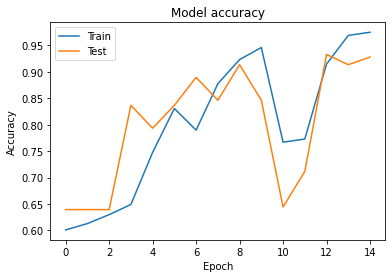

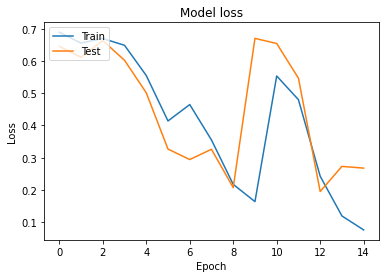

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [80]:
from PIL import Image
import glob
t = []

for filename in glob.glob('drive/MyDrive/MalariaClassification/Parasitized/*.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    t.append(im)

t=np.array(t).astype(int)/255

In [81]:
tek=[]
im =np.array(Image.open('drive/MyDrive/MalariaClassification/Uninfected/C94P55ThinF_IMG_20150821_165519_cell_128.png').resize((64,64)))
tek.append(im)

tek=np.array(tek).astype(int)/255

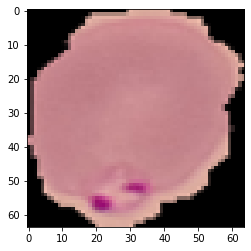

In [82]:
plt.imshow(t[5])

In [83]:
t

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [84]:
predict=(model.predict(t) > 0.5).astype("int32")

21/21 [==============================] - 9s 412ms/step


In [85]:
predicttek=(model.predict(tek) > 0.5).astype("int32")

1/1 [==============================] - 0s 48ms/step


In [86]:
predicttek

array([[0]], dtype=int32)

In [87]:
predict

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [88]:
predict=pd.DataFrame(np.array(predict).astype(int), columns=['Sonuc'])

In [89]:
predict

,Sonuc
0,1
1,1
2,1
3,1
4,1
...,...
658,1
659,1
660,1
661,1
